<a href="https://colab.research.google.com/github/kridtapon/Intra-Day-Pivot-Point-Rob-Booker/blob/main/Intra_Day_Pivot_Point_Rob_Booker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
<ipython-input-2-32f462d8834e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivot = (df['High'][i] + df['Low'][i] + df['Close'][i]) / 3
<ipython-input-2-32f462d8834e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivot = (df['High'][i] + df['Low'][i] + df['Close'][i]) / 3
<ipython-input-2-32f462d8834e>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pivo

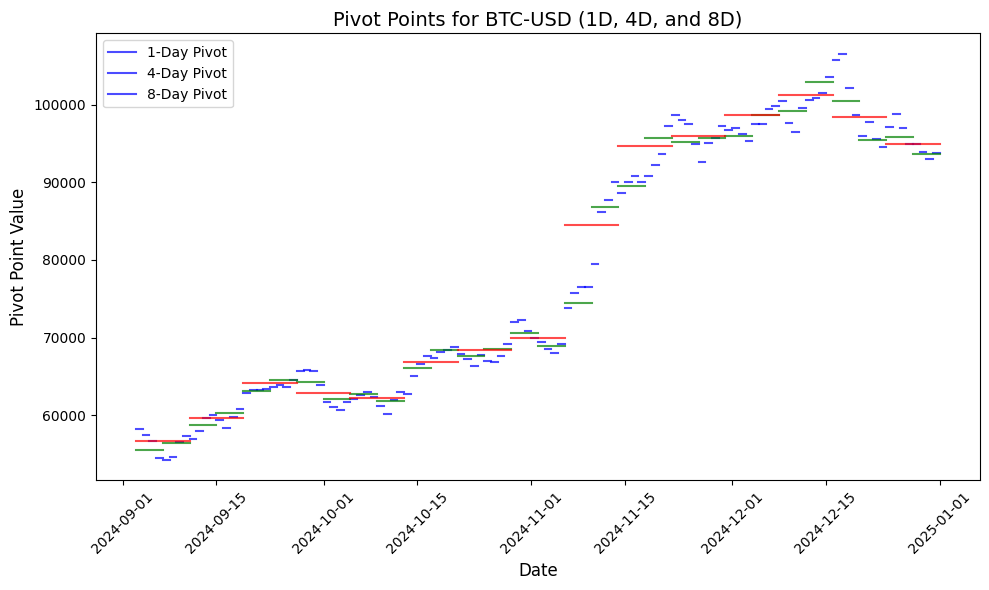

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Define the stock symbol
symbol = 'BTC-USD'

# Calculate the start date (120 days ago)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=120)).strftime('%Y-%m-%d')

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)
btc_data = df.copy()

# Function to calculate pivot points only
def calculate_pivots(df):
    pivots = []

    for i in range(0, len(df)):
        # Calculate the Pivot Point
        pivot = (df['High'][i] + df['Low'][i] + df['Close'][i]) / 3
        pivots.append(pivot)

    return pivots

# Function to calculate pivot points for different time frames (1 day, 4 day, and 8 day)
def calculate_multiple_pivots(df, time_frame='1d'):
    time_intervals = {'1d': '1D', '4d': '4D', '8d': '8D'}

    if time_frame not in time_intervals:
        print(f"Time frame '{time_frame}' not supported.")
        return

    # Resample the data based on the desired time frame (using OHLC aggregation)
    resampled_data = df.resample(time_intervals[time_frame]).agg({
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
    }).dropna()

    # Calculate the pivot points for the resampled data
    pivots = calculate_pivots(resampled_data)

    # Add pivots to the resampled data
    resampled_data['pivot'] = pivots

    return resampled_data

# Example: Calculate 1-day pivots
one_day_pivots = calculate_multiple_pivots(btc_data, time_frame='1d')

# Example: Calculate 4-day pivots
four_day_pivots = calculate_multiple_pivots(btc_data, time_frame='4d')

# Example: Calculate 8-day pivots
eight_day_pivots = calculate_multiple_pivots(btc_data, time_frame='8d')

# Plotting the pivot points as short horizontal lines for 1-day, 4-day, and 8-day pivots
plt.figure(figsize=(10, 6))

# Plot 1-day pivots as short horizontal lines
for i, pivot in enumerate(one_day_pivots['pivot']):
    plt.plot([one_day_pivots.index[i], one_day_pivots.index[i] + timedelta(days=1)], [pivot, pivot], color='b', linestyle='-', alpha=0.7)

# Plot 4-day pivots as short horizontal lines
for i, pivot in enumerate(four_day_pivots['pivot']):
    plt.plot([four_day_pivots.index[i], four_day_pivots.index[i] + timedelta(days=4)], [pivot, pivot], color='g', linestyle='-', alpha=0.7)

# Plot 8-day pivots as short horizontal lines
for i, pivot in enumerate(eight_day_pivots['pivot']):
    plt.plot([eight_day_pivots.index[i], eight_day_pivots.index[i] + timedelta(days=8)], [pivot, pivot], color='r', linestyle='-', alpha=0.7)

# Set plot titles and labels
plt.title(f'Pivot Points for {symbol} (1D, 4D, and 8D)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Pivot Point Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['1-Day Pivot', '4-Day Pivot', '8-Day Pivot'], loc='best')
plt.tight_layout()

# Show the pivot point chart
plt.show()